In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import inference as inf

In [30]:
import pandas as pd
train_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_Mar23/Mar23_train.csv")
valid_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_Mar23/Mar23_valid.csv")
test_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_Mar23/Mar23_test.csv")

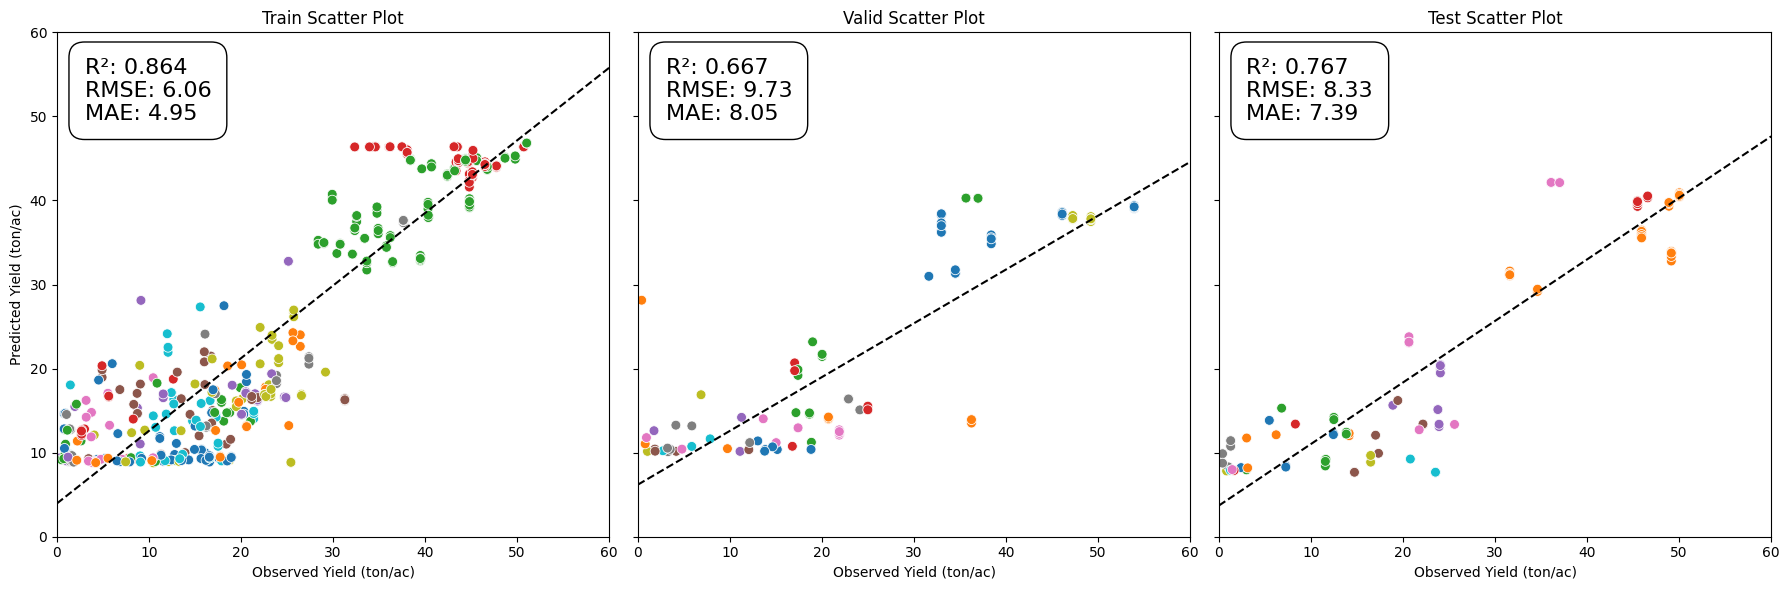

In [33]:
inf.plot_scatter_subplots(train_df, valid_df, test_df, 12)

In [22]:
def count_samples_by_crop(df):
    crop_counts = df['crop_name'].value_counts().to_dict()
    return crop_counts

In [ ]:
import pandas as pd
train_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_003/003_train.csv")
valid_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_003/003_valid.csv")
test_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_003/003_test.csv")

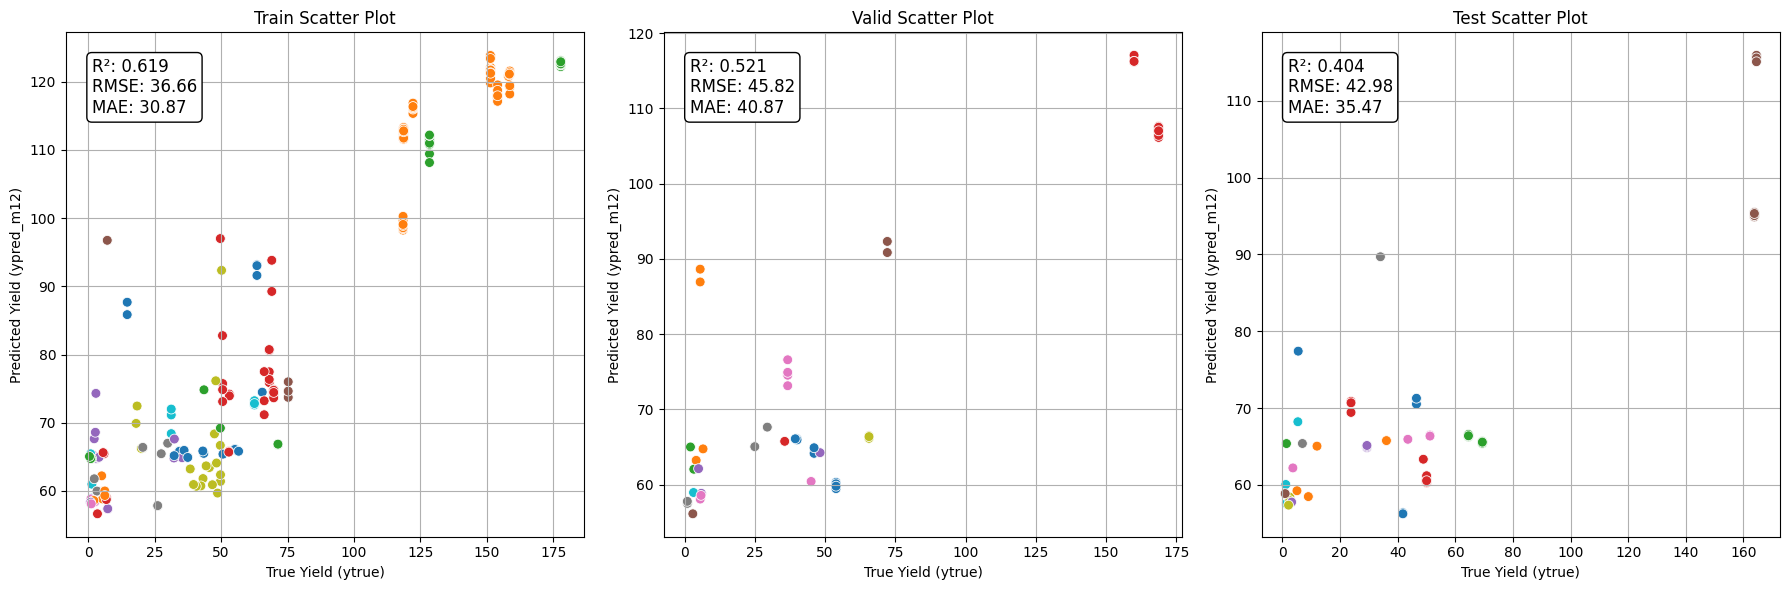

In [5]:
inf.plot_scatter_subplots(train_df, valid_df, test_df, 12)

In [12]:
import pandas as pd
train_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_test/test_train.csv")
valid_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_test/test_valid.csv")
test_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_test/test_test.csv")

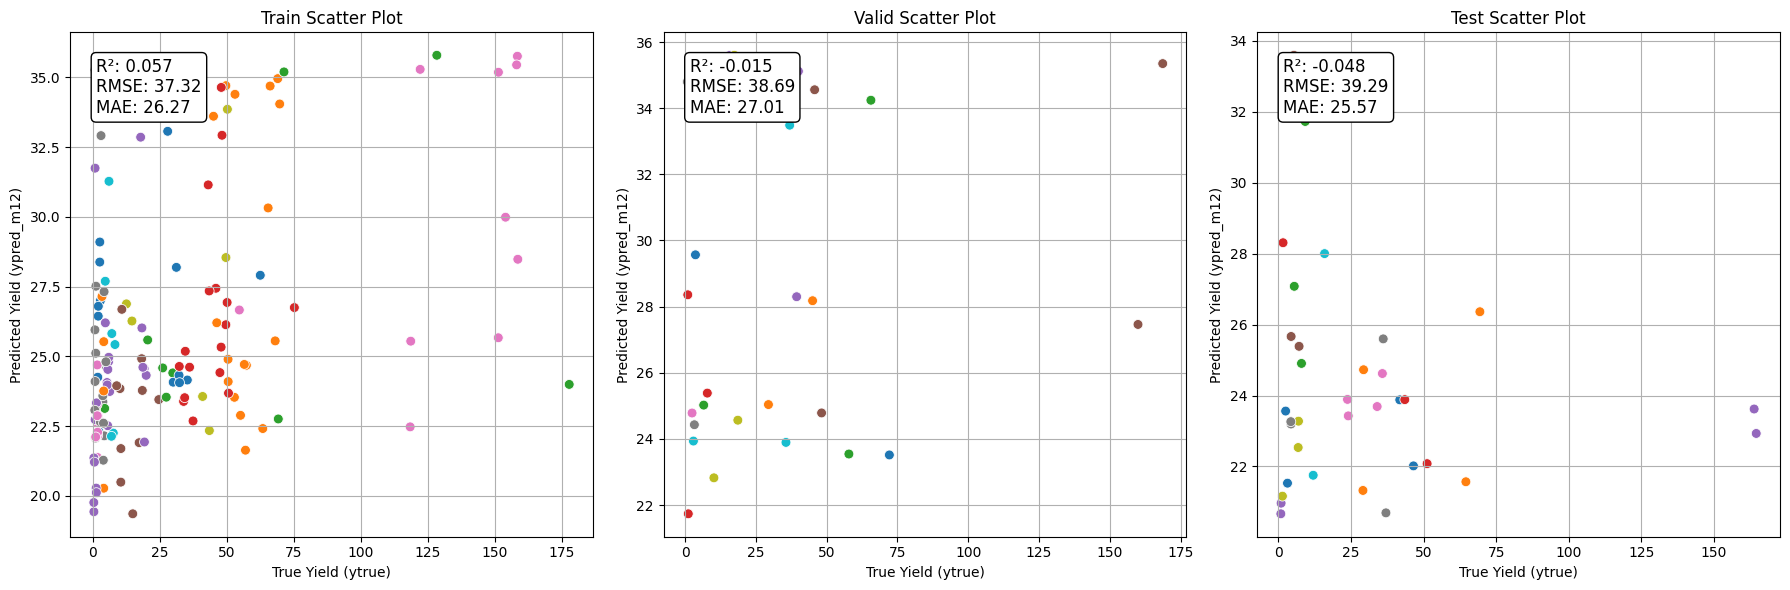

In [13]:
inf.plot_scatter_subplots(train_df, valid_df, test_df, 12)